# **Creating Neural Networks**

##### **Tutorial from https://www.youtube.com/playlist?list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3**

In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

In [ ]:
X, y = spiral_data(100,2)


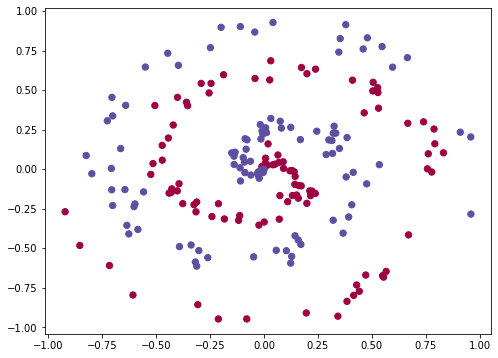

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[: ,0], X[: ,1], c= y, s= 40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
weights = 0.10*np.random.randn(2, 3)
np.zeros((1, 3))
output = np.dot(X, weights) + biases
output = np.maximum(0, X)

In [ ]:
class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10*np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))
  def forward(self,inputs):
    self.output = np.dot(inputs, self.weights) + self.biases  


class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)


class Activation_Softmax:
  def forward(self,inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis =1 , keepdims=True)
    self.output = probabilities


class Loss:
  def calculate(self,output,y):
    sample_losses = self.forward(output,y)
    data_loss = np.mean(sample_losses)
    return data_loss

class Loss_categoricalcrossentropy(Loss):
  def forward(self,ypred, ytrue):
    samples = len(ypred)
    ypred_clipped = np.clip(ypred, 1e-7, 1-1e-7)
    if len(ytrue.shape) == 1:
      correct_confidences = ypred_clipped[range(samples), ytrue]

    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(ypred_clipped * ytrue, axis = 1)

    negative_log_likeihoods = -np.log(correct_confidences)
    return negative_log_likeihoods


dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)


loss_function = Loss_categoricalcrossentropy()
loss = loss_function.calculate(activation2.output, y)

print(activation2.output[:1],y[:1])
print(loss)

[[0.33333334 0.33333334 0.33333334]] [0]
1.0977741
